In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\user\AppData\Local\Temp\ipykernel_20964\1018955272.py:11: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(
C:\Users\user\AppData\Local\Temp\ipykernel_20964\1018955272.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-i

In [2]:
h = lambda n, J, z: sum([J[i] * (z[i] - 1) * (z[i + 1] - 1) for i in range(n - 1)])
def effective_hem(size, J):
    hem = np.zeros((2**size, 2**size))
    for i in range(2**size):
        binary = '{0:b}'.format(i).zfill(size)
        Z = [(-1)**int(i) for i in binary]
        hem[i,i] = h(size, J, Z)
    return hem
#print(effective_hem(4,[1,1,1]))

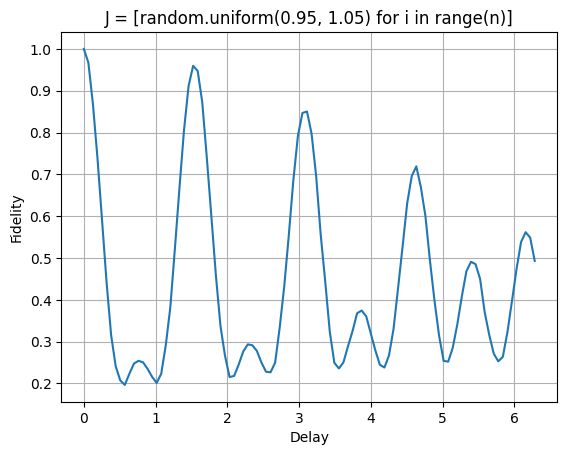

In [67]:
from scipy.linalg import expm
import random
res = []
delay = np.linspace(0,2*np.pi,100)

fid = []
n = 3
J = [random.uniform(0.90, 1.1) for _ in range(n-1)]
J = [1.0818719219848087, 0.9534243710504171]
for t in delay:
    #qr = QuantumRegister(n)
    #cr = ClassicalRegister(n)
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)

    U = expm((-1j*t)*effective_hem(n,J))
    U = qi.Operator(U)

    qc.unitary(U, [i for i in range(n)])

    for i in range(n):
        qc.h(i)
    qc.measure_all()
    #qc.measure(qr[1],cr[1])

    #Simulator
    qcomp = Aer.get_backend("qasm_simulator")
    result = qiskit.execute(qc, Aer.get_backend('qasm_simulator'), shots=8000).result()
    fid.append(result.get_counts().get('0'*n,0)/8000)
    res.append(result.get_counts())




plt.grid()
plt.ylabel('Fidelity')
plt.xlabel('Delay')
plt.title('J = [random.uniform(0.95, 1.05) for i in range(n)]')
plt.plot(delay,fid)

[1.0818719219848087, 0.9534243710504171]
0.3807991095260356


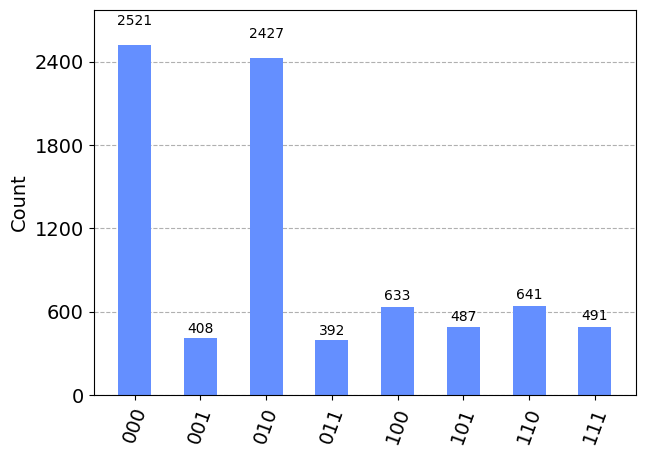

In [68]:
#Plots qiskit histogram:
print(J)
print(delay[6])
from qiskit.visualization import plot_histogram
plot_histogram(res[6])


8000
7907
7936
7903
7872
7664
7548
7444
7560
7196
7465
7207
6930
6598
7043
6587
6086
5867
6587
5882
5174
-985
-27
5058
4086
4397
3215
2001
3208
3752
5145
3742
2290
3004
4728
3041
1456
-1852
597
2467
638
-1918
12
-1944
252
2020
4059
2099
118
-1987
66
-1878
138
2268
355
-1583
298
1845
59
2704
980
-1629
1538
-77
1512
3846
2480
3871
2474
4478
3330
4531
3358
5287
4356
3471
4368
660
6709
6062
5418
6691
6260
5822
6262
7329
7116
6880
7102
7687
7580
7478
7582
7954
7971
7951
7942
7989
7991
7984
7982
7855
7810
7765
7820
7526
7684
7514
7368
-325
6735
7028
6706
6411
5868
6438
5962
-797
4887
5655
4904
4935
5934
4880
3868
-1284
-2549
1656
2902
1525
44
3519
2000
-1673
-3400
-1663
1200
1948
96
-1787
530
-1982
173
2140
244
2028
3967
1985
-66
-2024
-110
-2082
8
-1899
-26
2283
364
1715
4490
2708
980
-1540
-3035
-1498
1930
-1313
-2625
1467
2750
4728
3636
2532
3608
5626
4845
4047
4842
-565
5717
6284
5698
6855
7235
6849
6470
7402
7202
7402
7204
7790
7717
7797
7740
7973
7963
7972
7964
7982
7987
7978
7974
7791

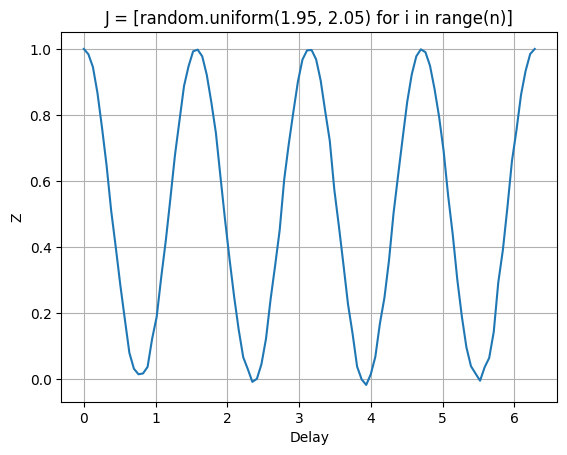

In [5]:
Z = []
for r in res:
    z = 0
    for bit in r.keys():
        number = [(-1)**int(i) for i in bit]
        mult = np.prod(number)
        z += mult * r.get(bit,0)
        print(z)
    Z.append(z/8000)

plt.grid()
plt.ylabel('Z')
plt.xlabel('Delay')
plt.title('J = [random.uniform(1.95, 2.05) for i in range(n)]')
plt.plot(delay,Z)

In [24]:
print(res)

[{'00': 8000}, {'00': 7896, '11': 28, '01': 36, '10': 40}, {'00': 7633, '10': 129, '01': 117, '11': 121}, {'00': 7189, '11': 281, '01': 262, '10': 268}, {'00': 6597, '10': 504, '11': 442, '01': 457}, {'00': 5930, '10': 720, '11': 689, '01': 661}, {'01': 974, '00': 5133, '11': 958, '10': 935}, {'00': 4385, '01': 1167, '11': 1223, '10': 1225}, {'10': 1439, '01': 1507, '00': 3620, '11': 1434}, {'11': 1622, '01': 1653, '00': 3120, '10': 1605}, {'11': 1774, '01': 1841, '00': 2573, '10': 1812}, {'11': 1942, '01': 2007, '00': 2146, '10': 1905}, {'00': 1966, '11': 2004, '10': 2041, '01': 1989}, {'00': 1962, '11': 2023, '10': 2053, '01': 1962}, {'00': 2283, '10': 1938, '11': 1941, '01': 1838}, {'11': 1710, '01': 1836, '10': 1777, '00': 2677}, {'10': 1536, '00': 3255, '01': 1574, '11': 1635}, {'01': 1393, '00': 3844, '10': 1380, '11': 1383}, {'11': 1105, '00': 4625, '01': 1100, '10': 1170}, {'00': 5377, '11': 881, '10': 885, '01': 857}, {'00': 6023, '10': 647, '01': 657, '11': 673}, {'00': 6810,